# Pokémon as a Toy Model for Team Building
<a id='top'></a>
- [Introduction](#intro)
    - [Pokémon Battling](#battling)
    - [Why Generation 1](#gen1)
- [Data](#data)
- [Predicting Usage](#predict)


<a id='intro'></a>
## Introduction

The management and application of human resources is one of the great unsolved problems of organization building and business and an active field of research. One of the great difficulties of researching this problem is that often times the data is simply not available. There is no clear concensus on what attributes can and should be measured (how important is college GPA? High school GPA? Age? How is job performance even quantified?), and privacy concerns make accessing what data is available difficult and sometimes ethically dubious.

A common alternative to more direct research into human resources is the study of sports statistics, such as sabermetrics in baseball. In this domain, there is more obvious consensus and agreement on the measurement of attribute and outcomes. However, the problem still remains complex, with a great deal of debate and ongoing study, making sports statistics inappropriate for a demonstrative "toy" model.

The Pokémon video game series provides such an ideal playground and demonstrative toy model for studies into effectiveness. Pokémon statistics are well-defined with clearly understood relationships between attributes and final outcomes. The goal is also easiily understood and defined: find the best pokémon for winning pokémon battles.

[Return to Top](#top)

<a id='battling'></a>
### Pokémon Battling

Pokémon, or Pocket Monsters, is a media franchise that includes a RPG video game series. In the game, players capture and train pokémon in order to build teams to battle other teams of pokémon.

The factors in usefulness of a pokémon in battling are their stats, typing, and movepool:
1. Stats
    - these determine the raw numbers that go into the calculations of the battle
2. Typing
    - Pokémon and pokémon moves both have "elemental" types; effectiveness is determined by type match-ups:
        - Weakness ("It's super effective") causes damage to be x2
        - Resistance ("It's not very effective") causes damage to be x0.5
        - Immunity ("It doesn't effect...") causes damage to be x0
        - Same Type Attack Bonus (STAB): using an attack that is the same type as the pokémon causes damage to be x1.5
3. Movepool
    - the possible attacks and actions that a pokémon can learn (great stats are of limited use if the pokémon can't learn powerful moves)

[Return to Top](#top)

<a id='gen1'></a>
### Why Generation 1

For simplicity, this study focuses on the first Generation of Pokémon games (Red, Blue, Green, Yellow) which the first 151 pokémon. The simplicity of the first generation includes more than the comparatively low number of pokémon:
- While later generations used separate "Special Attack" and "Special Defense" values, the first generation had only a single "Special" value.
- Fewer pokémon "type" categories were in existence ("Dark" and "Steel" were introduced in the second generation, and "Fairy" in the sixth).
- There were well known balance problems in the first generation ("Psychic" was overpowered, a single "Special" stat made its importance greater) that can be treated as "targets" for rediscovery in analysis.

[Return to Top](#top)

<a id='data'></a>
## Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
g1 = pd.read_csv('gen1.csv')
g1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
Name     151 non-null object
Type1    151 non-null object
Type2    62 non-null object
Tier     138 non-null object
HP       151 non-null int64
Atk      151 non-null int64
Def      151 non-null int64
SpA      151 non-null int64
SpD      151 non-null int64
Spe      151 non-null int64
dtypes: int64(6), object(4)
memory usage: 11.9+ KB


This data was obtained from the "[Smogon University](http://www.smogon.com)" Competitive Pokémon Battling Community.

The columns include:
- Name: the identifying name of the pokémon
- Type1: the "elemental" category of the pokémon that determines weaknesses and resistance to attack types
- Type2: some pokémon have two types.
- Tier: usage category in competitive pokémon battling assigned by the Smogon community
    - Uber: too powerful for usual competitive play
    - OU: Overused, pokémon usually used in competitive play
    - UU: Underused, pokémon rarely used in competitive play
    - LC: Little Cup, weak "juvenile" pokémon not used in standard competitive play but used in their own seperate class of competitive play
- HP: Health Points, the health reduced by damage during battle; when reduced to 0 the pokémon faints
- Atk: Attack, determines the effectiveness of "physical" attacks
- Def: Defense, determines the resistence to enemy "physical" attacks
- SpA: Special Attack, determines the effectiveness of "special" attacks
- SpD: Special Defense, determines the resistence to enemy "special" attacks
- Spe: Speed, determines the turn order in pokémon battles


In order to maintain consistency between generations, the dataset includes both a "Special Attack" and "Special Defense" stat, but in the first generation, these values are identical, and so the ```SpD``` column can be removed.

In [3]:
del g1['SpD']
g1['Total'] = g1.HP + g1.Atk + g1.Def + g1.SpA + g1.Spe

In [4]:
g1.head()

,Name,Type1,Type2,Tier,HP,Atk,Def,SpA,Spe,Total
0,Abra,Psychic,NaN,LC,25,20,15,105,90,255
1,Aerodactyl,Flying,Rock,UU,80,105,65,60,130,440
2,Alakazam,Psychic,NaN,OU,55,50,45,135,120,405
3,Arbok,Poison,NaN,UU,60,85,69,65,80,359
4,Arcanine,Fire,NaN,UU,90,110,80,80,95,455


[Return to Top](#top)

### The Most Powerful Pokémon by Stat Totals

In [5]:
g1.sort_values('Total',ascending=False).head(10)

,Name,Type1,Type2,Tier,HP,Atk,Def,SpA,Spe,Total
82,Mewtwo,Psychic,NaN,Uber,106,110,90,154,130,590
81,Mew,Psychic,NaN,Uber,100,100,100,100,100,500
26,Dragonite,Dragon,Flying,UU,91,134,95,100,80,500
83,Moltres,Fire,Flying,UU,90,100,90,125,90,495
149,Zapdos,Electric,Flying,OU,90,90,85,125,100,490
5,Articuno,Flying,Ice,UU,90,85,100,125,85,485
18,Cloyster,Ice,Water,OU,50,95,180,85,70,480
50,Gyarados,Flying,Water,UU,95,125,79,100,81,480
35,Exeggutor,Grass,Psychic,OU,95,95,85,125,55,455
4,Arcanine,Fire,NaN,UU,90,110,80,80,95,455


It is immediately obvious that stat totals alone are not enough to dictate competitive use. Dragonite has stat totals equal to one of the Ubers, and Moltres almost equal, but both are considered UU. According to Smogon, part of this is due to crippling weaknesses in their types: Dragonite's Dragon/Flying typing gives it a crippling double weakness to ice attacks, while Moltres's Fire/Flying and Articuno's Ice/Flying give them double weaknesses to rock attacks (Moltres and Articuno also suffer in having limited movepools).


[Return to Top](#top)

### Visualizing Stat Distributions

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

def _radar_factory(num_vars):
    theta = 2*np.pi * np.linspace(0, 1-1./num_vars, num_vars)
    theta += np.pi/2

    def unit_poly_verts(theta):
        x0, y0, r = [0.5] * 3
        verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
        return verts

    class RadarAxes(PolarAxes):
        name = 'radar'
        RESOLUTION = 1

        def fill(self, *args, **kwargs):
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(theta * 180/np.pi, labels)

        def _gen_axes_patch(self):
            verts = unit_poly_verts(theta)
            return plt.Polygon(verts, closed=True, edgecolor='k')

        def _gen_axes_spines(self):
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            verts.append(verts[0])
            path = Path(verts)
            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta

def radar_graph(title='', labels = [], values = [], optimum = []):
    N = len(labels) 
    theta = _radar_factory(N)
    max_val = max(max(optimum), max(values))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='radar')
    ax.plot(theta, values, color='k')
    ax.plot(theta, optimum, color='r')
    ax.set_varlabels(labels)
    ax.set_title(title + '\n')
    plt.show()

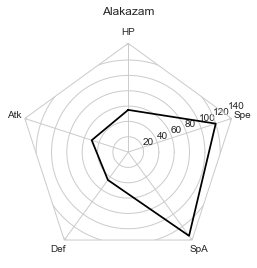

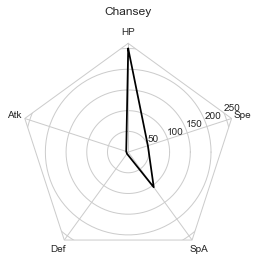

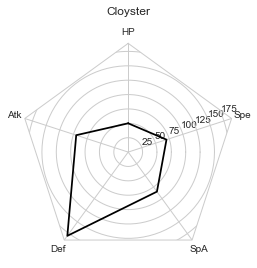

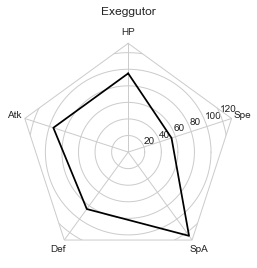

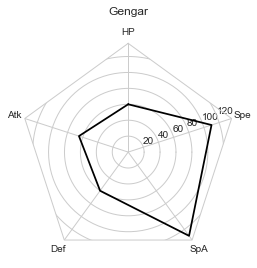

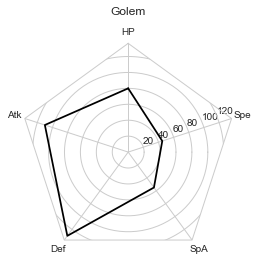

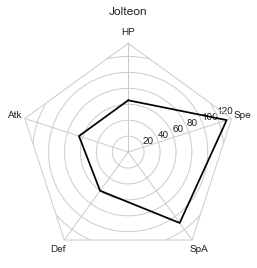

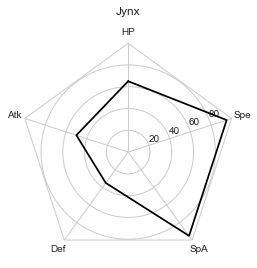

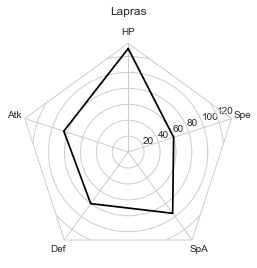

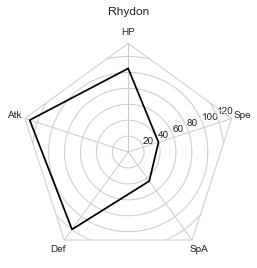

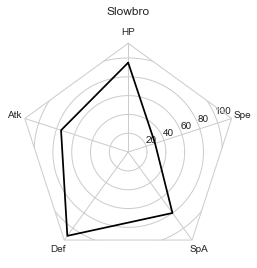

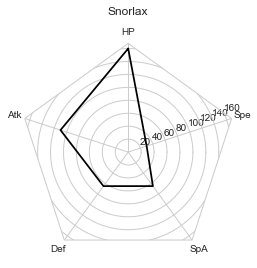

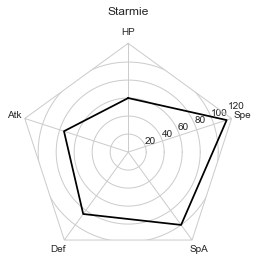

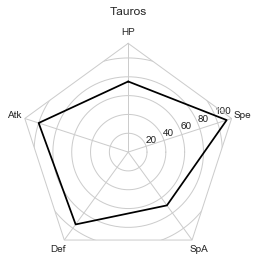

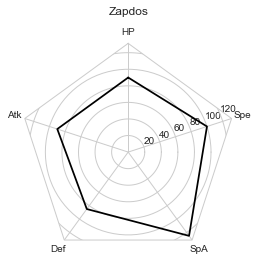

In [7]:
stats = ['HP','Atk','Def','SpA','Spe']
names = g1[g1.Tier=='OU']['Name']

for n in names:
    radar_graph(title=n,labels=stats,values=g1[g1.Name==n][stats].values.tolist()[0],optimum=[0,0,0,0,0])

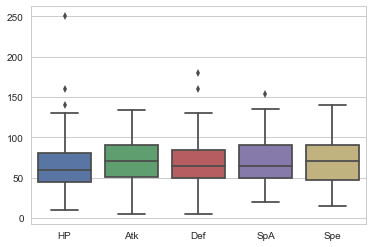

In [8]:
sns.boxplot(data=g1[['HP','Atk','Def','SpA','Spe']])

In [9]:
gstat = g1[['Name','Type1','Type2','HP','Atk','Def','SpA','Spe']]
gstat = pd.melt(gstat, id_vars=["Name", "Type1", "Type2"], var_name="Stat")

In [10]:
gstat.head()

,Name,Type1,Type2,Stat,value
0,Abra,Psychic,NaN,HP,25
1,Aerodactyl,Flying,Rock,HP,80
2,Alakazam,Psychic,NaN,HP,55
3,Arbok,Poison,NaN,HP,60
4,Arcanine,Fire,NaN,HP,90


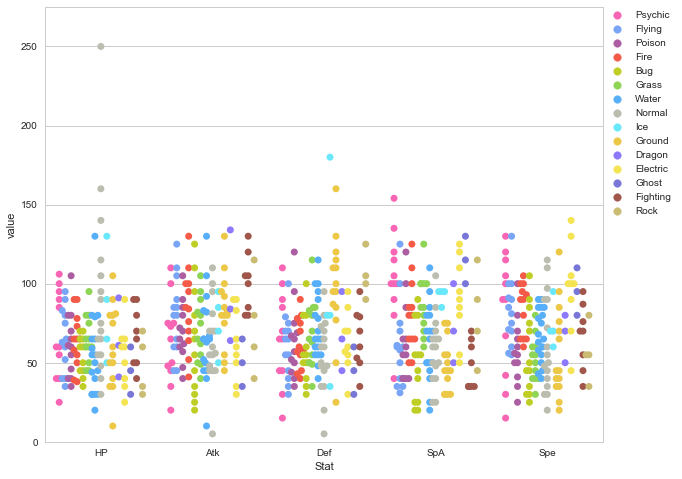

In [11]:
sns.set_style("whitegrid")
with sns.color_palette([
    '#FB61B4', '#75A4F9', '#AD5CA2', '#F95643', '#C3D221',
    '#8ED752', '#53AFFE', '#BBBDAF', '#66EBFF', '#F0CA42',
    '#8B76FF', '#F8E64E', '#7673DA', '#A35449', '#CDBD72',],
    n_colors=15, desat=.95):
    
    plt.figure(figsize=(10,8))
    plt.ylim(0, 275)
    sns.swarmplot(x="Stat", y="value", data=gstat, hue="Type1", split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.show()

In [12]:
def heatm(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap="coolwarm")
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)
    plt.show()

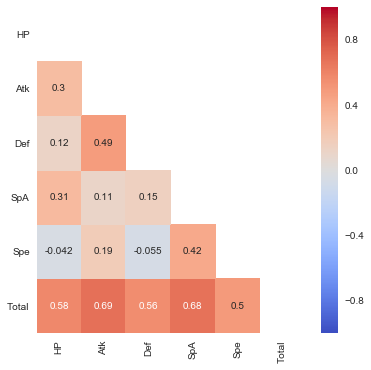

In [13]:
heatm(g1)

[Return to Top](#top)


<a id='predict'></a>
## Predicting Usage

In [14]:
g1.groupby('Tier').agg(np.mean)

,HP,Atk,Def,SpA,Spe,Total
Tier,,,,,,
LC,45.518519,55.296296,53.500000,51.222222,54.388889,259.925926
OU,95.666667,80.000000,82.666667,94.666667,77.333333,430.333333
UU,71.641791,84.731343,77.134328,78.462687,79.208955,391.179104
Uber,103.000000,105.000000,95.000000,127.000000,115.000000,545.000000


In [15]:
g1['Used'] = g1['Tier'].map(lambda x: 1 if x == 'Uber' or x == 'OU' else 0)

In [16]:
g1.head()

,Name,Type1,Type2,Tier,HP,Atk,Def,SpA,Spe,Total,Used
0,Abra,Psychic,NaN,LC,25,20,15,105,90,255,0
1,Aerodactyl,Flying,Rock,UU,80,105,65,60,130,440,0
2,Alakazam,Psychic,NaN,OU,55,50,45,135,120,405,1
3,Arbok,Poison,NaN,UU,60,85,69,65,80,359,0
4,Arcanine,Fire,NaN,UU,90,110,80,80,95,455,0


In [17]:
g1.Used.value_counts()

0    134
1     17
Name: Used, dtype: int64

In [18]:
np.mean(g1.Used.values)

0.11258278145695365

In [19]:
g1.groupby('Used').agg(np.mean)

,HP,Atk,Def,SpA,Spe,Total
Used,,,,,,
0,60.111940,70.858209,66.134328,65.544776,67.156716,329.805970
1,96.529412,82.941176,84.117647,98.470588,81.764706,443.823529


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score

In [21]:
stats = ['HP','Atk','Def','SpA','Spe']

X = g1[stats]
y = g1.Used.values

In [22]:
lr_params = {
    'solver':['liblinear'],
    'penalty':['l2','l1'],
    'C':range(1, 5, 1)
}

lr = LogisticRegression()

lr_gs = GridSearchCV(lr, lr_params, cv=5, verbose=1)
lr_gs.fit(X, y)

print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'penalty': 'l1', 'C': 3, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


In [23]:
lr_scores = cross_val_score(best_lr, X, y, cv=5)
print 'Scores', lr_scores
print 'Ave Score', np.mean(lr_scores)
print 'Baseline', 1 - np.mean(y)

Scores [ 0.90322581  0.87096774  0.96666667  0.86666667  0.89655172]
Ave Score 0.900815721172
Baseline 0.887417218543


In [24]:
def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    fig, axr = plt.subplots(figsize=(5,5))
    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='r', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)
    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('False Positive Rate', fontsize=16)
    axr.set_ylabel('True Positive Rate', fontsize=16)
    axr.set_title(varname+' vs. Not\n', fontsize=20)
    axr.legend(loc="lower right", fontsize=12)
    plt.show()

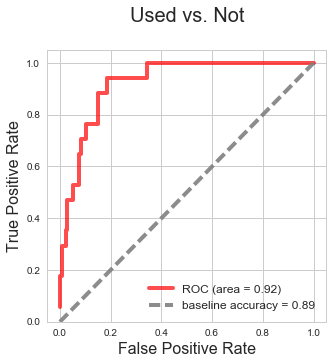

In [25]:
plot_roc(best_lr, X, y, 'Used')

In [26]:
coefs = pd.DataFrame({'Coef':best_lr.coef_[0],'Abs_Coef':np.abs(best_lr.coef_[0]),'Variable':X.columns})
coefs.sort_values('Abs_Coef',ascending=False,inplace=True)
coefs[:10]

,Abs_Coef,Coef,Variable
0,0.045348,0.045348,HP
2,0.035128,0.035128,Def
4,0.024454,0.024454,Spe
3,0.024267,0.024267,SpA
1,0.009887,-0.009887,Atk


In [27]:
y_pred = best_lr.fit(X, y).predict(X)

In [28]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[131   3]
 [ 11   6]]


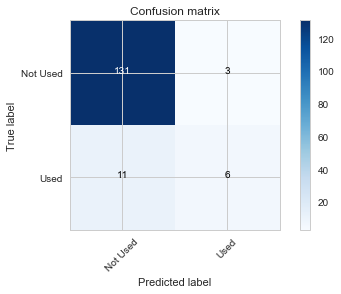

In [29]:
plot_confusion_matrix(confusion_matrix(y, y_pred),classes=['Not Used','Used'])

What truly separates the used from the not used are not just stats. While low stats are important in classifying a pokémon as not used, even high stats are not sufficient to become used. Apparently other factors such as typing and move pools make the difference between a used pokémon and a high-stat not used.

This may in fact be a remarkably good model for top level success. High stats is required to reach the upper levels, but once among other high stat competitors, the leading figures are distinguished by other factors analogous to typing and move pools.

In [30]:
g1['Predicted'] = y_pred

In [31]:
g1[(g1.Predicted == 1) | (g1.Used == 1)].sort_values('Total',ascending=False)

,Name,Type1,Type2,Tier,HP,Atk,Def,SpA,Spe,Total,Used,Predicted
82,Mewtwo,Psychic,NaN,Uber,106,110,90,154,130,590,1,1
81,Mew,Psychic,NaN,Uber,100,100,100,100,100,500,1,1
83,Moltres,Fire,Flying,UU,90,100,90,125,90,495,0,1
149,Zapdos,Electric,Flying,OU,90,90,85,125,100,490,1,1
5,Articuno,Flying,Ice,UU,90,85,100,125,85,485,0,1
18,Cloyster,Ice,Water,OU,50,95,180,85,70,480,1,1
35,Exeggutor,Grass,Psychic,OU,95,95,85,125,55,455,1,0
68,Lapras,Ice,Water,OU,130,85,80,95,60,450,1,1
133,Tauros,Normal,NaN,OU,75,100,95,70,110,450,1,0
116,Rhydon,Ground,Rock,OU,105,130,120,45,40,440,1,0


### Including Type

Typing is the last major factor in tiering available in this data (the other factor not available is movepool). Next steps are to include typing in this study.